<a href="https://colab.research.google.com/github/mochammadcholilurrokhman/PCVK_Ganjil_Mochammad-Cholilur-Rokhman/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan: 50


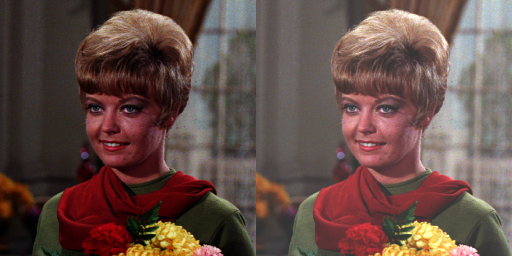

In [43]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np

print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')

try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]): #range (function) lebar
  for x in range(original.shape[1]): #panjang
    for c in range(original.shape[2]): #channel warna
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255) #batas range warna

#cara simpel tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta-brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

**Tugas Praktikum**
1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut
2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga menghasilkan keluaran seperti berikut
3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi log, sehingga menghasilkan keluaran seperti berikut
4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness, dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut
5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal, tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna biru menjadi grayscale seperti pada contoh berikut:

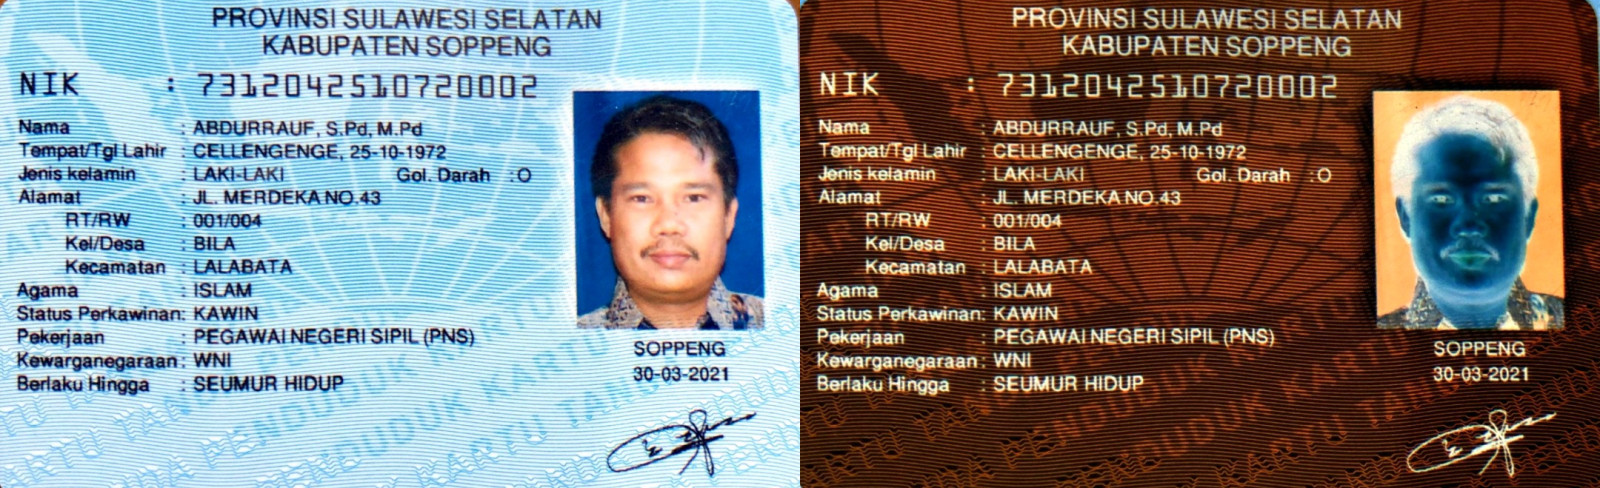

In [44]:
# No 1
img = cv.imread('/content/drive/MyDrive/PCVK/KTP.jpg')
inverse = 255 - img

final_frame = cv.hconcat((img, inverse))
cv2_imshow(final_frame)

 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan [-255 - 255]: 50
Masukkan kontras [1.0 - 3.0]:2


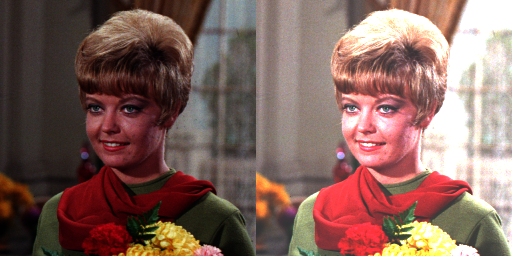

In [45]:
# No 2
print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')

try:
  brightness = int(input('Masukkan nilai kecerahan [-255 - 255]: '))
  contrass = float(input('Masukkan kontras [1.0 - 3.0]:'))
except ValueError:
  print('Error, not a number')


img = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')


#cara simpel tanpa for loop
image = cv.convertScaleAbs(img, alpha=contrass, beta=brightness)

final_frame = cv.hconcat((img, image))
cv2_imshow(final_frame)

 Mengubah tingkat kecerahan citra dengan Transformasi Log 
----------------------------------------------------------
Masukkan nilai kecerahan: 50


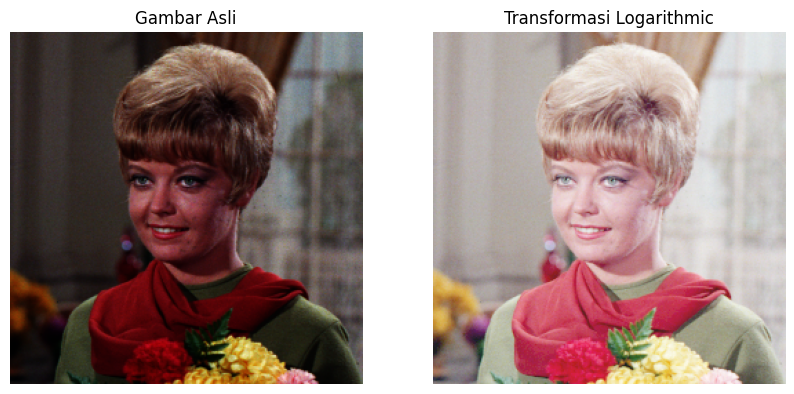

In [46]:
# NO 3
print(' Mengubah tingkat kecerahan citra dengan Transformasi Log ')
print('----------------------------------------------------------')

try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

img = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Menampilkan gambar asli
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.title('Gambar Asli')
plt.imshow(img_rgb)
plt.axis('off')

# Terapkan transformasi logarithmic
c = 255 / np.log(1 + np.max(img_rgb))  # Konstanta scaling
log_transformed = c * np.log(1 + img_rgb)

# Pastikan nilai berada dalam rentang [0, 255]
log_transformed = np.array(log_transformed, dtype=np.uint8)

# Menampilkan gambar hasil transformasi
plt.subplot(1, 2, 2)
plt.title('Transformasi Logarithmic')
plt.imshow(log_transformed)
plt.axis('off')
plt.show()

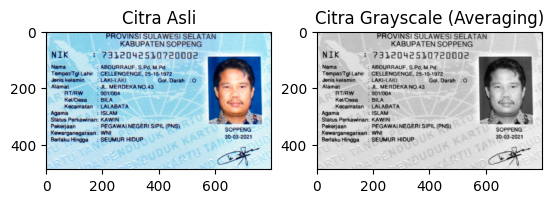

In [61]:
# No 4
# A. Averaging
import matplotlib.pyplot as plt
img = cv.imread('/content/drive/MyDrive/PCVK/KTP.jpg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Konversi citra ke grayscale menggunakan metode averaging
gray_avg = np.mean(img_rgb, axis=2).astype(np.uint8)

# Menampilkan citra asli dan citra grayscale
plt.subplot(1, 2, 1)
plt.title('Citra Asli')
plt.imshow(img_rgb)
plt.axis('on')

plt.subplot(1, 2, 2)
plt.title('Citra Grayscale (Averaging)')
plt.imshow(gray_avg, cmap='gray')
plt.axis('on')

plt.show()



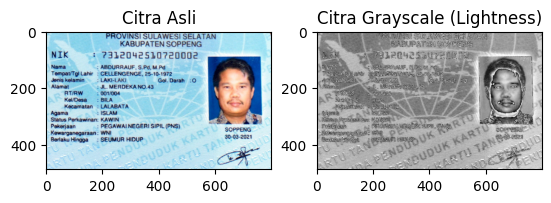

In [72]:
# b. Lightness

# Membaca citra
img = cv.imread('/content/drive/MyDrive/PCVK/KTP.jpg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Menghitung nilai minimum dan maksimum dari channel R, G, dan B
min_channel = np.min(img_rgb, axis=2)
max_channel = np.max(img_rgb, axis=2)

# Menghitung grayscale menggunakan metode Lightness
lightness = ((max_channel + min_channel) / 2).astype(np.uint8)

# Menampilkan citra asli dan citra grayscale Lightness
plt.subplot(1, 2, 1)
plt.title('Citra Asli')
plt.imshow(img_rgb, cmap="gray")
plt.axis('on')

plt.subplot(1, 2, 2)
plt.title('Citra Grayscale (Lightness)')
plt.imshow(lightness, cmap="gray")
plt.axis('on')
plt.show()

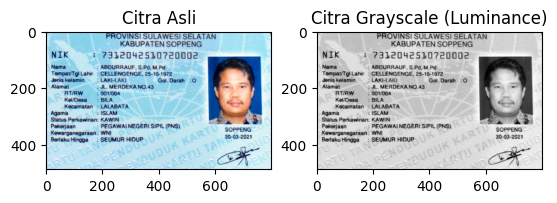

In [49]:
# c. Luminance
img = cv.imread('/content/drive/MyDrive/PCVK/KTP.jpg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Menghitung grayscale menggunakan metode Luminance
luminance = (0.299 * img_rgb[:, :, 0] + 0.587 * img_rgb[:, :, 1] + 0.114 * img_rgb[:, :, 2]).astype(np.uint8)

# Menampilkan citra asli dan citra grayscale Luminance
plt.subplot(1, 2, 1)
plt.title('Citra Asli')
plt.imshow(img_rgb)
plt.axis('on')

plt.subplot(1, 2, 2)
plt.title('Citra Grayscale (Luminance)')
plt.imshow(luminance, cmap="gray")
plt.axis('on')
plt.show()


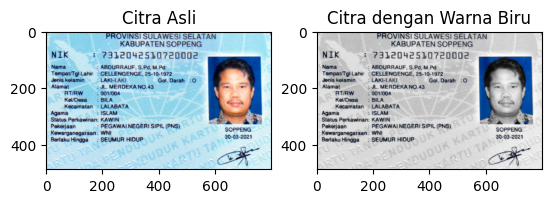

In [50]:
# No 5
# Membaca citra
img = cv.imread('/content/drive/MyDrive/PCVK/KTP.jpg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Membuat mask untuk warna biru
lower_blue = np.array([0, 0, 100])
upper_blue = np.array([100, 100, 255])
mask = cv.inRange(img_rgb, lower_blue, upper_blue)

# Membuat citra grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray_rgb = cv.cvtColor(gray, cv.COLOR_GRAY2RGB)

# Menggabungkan citra berwarna dan grayscale berdasarkan mask
result = np.where(mask[:, :, np.newaxis] == 255, img_rgb, gray_rgb)

# Menampilkan citra asli dan hasil
plt.subplot(1, 2, 1)
plt.title('Citra Asli')
plt.imshow(img_rgb)
plt.axis('on')

plt.subplot(1, 2, 2)
plt.title('Citra dengan Warna Biru')
plt.imshow(result)
plt.axis('on')
plt.show()